<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

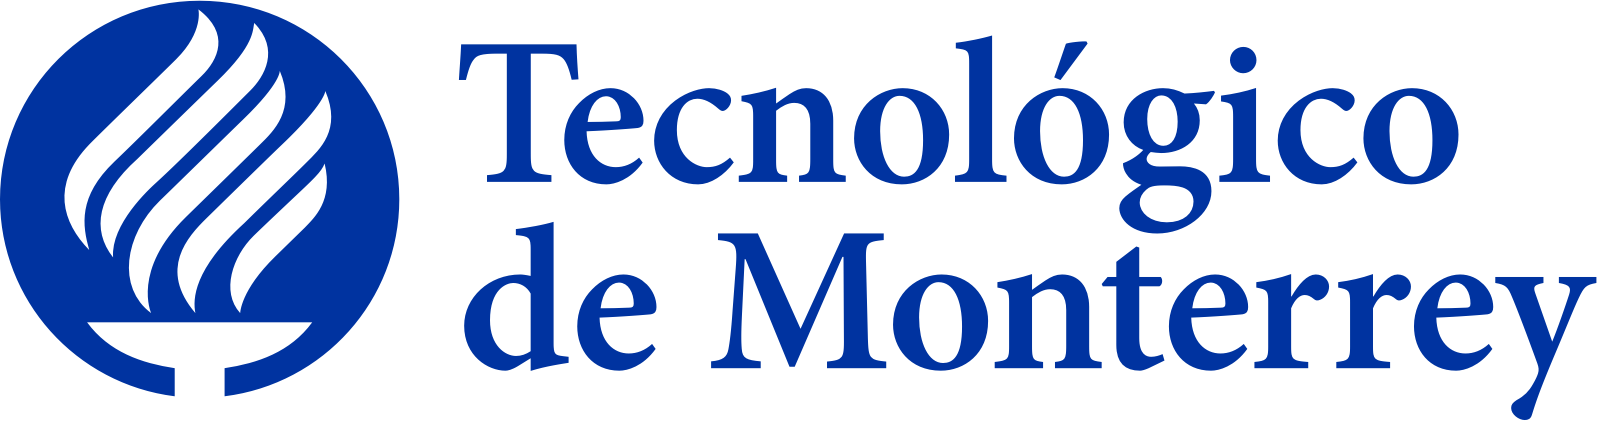


José Juan Suárez Ramos<br>
A01224078<br>
Tarea 1

In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier as dtc
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

encoder = preprocessing.LabelEncoder()

a) Realiza un análisis descriptivo y gráfico de los datos. 

In [17]:
train_data = pd.read_csv('~/Documents/data.csv')

In [18]:
train_data.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,1,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Shanghai,China,female,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zhejiang,China,male,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tianjin,China,female,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Tianjin,China,male,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train_data = train_data.drop('id', axis=1)
train_data = train_data.fillna(np.nan, axis=0)

In [20]:
train_data.head()

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Shanghai,China,female,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Zhejiang,China,male,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Tianjin,China,female,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Tianjin,China,male,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(train_data.isna().sum())

location         0
country          0
gender         183
age            242
sym_on         636
hosp_vis       636
vis_wuhan        0
from_wuhan       4
death            0
recov            0
symptom1       815
symptom2       924
symptom3      1012
symptom4      1066
symptom5      1082
symptom6      1084
dtype: int64


# b) Cleaning NaN values

In [22]:
# Start to clean up NaN values
train_data['location'] = encoder.fit_transform(train_data['location'].astype(str))
train_data['country'] = encoder.fit_transform(train_data['country'].astype(str))
train_data['gender'] = encoder.fit_transform(train_data['gender'].astype(str))
train_data['age'] = train_data['age'].fillna(value=train_data['age'].mean())
train_data[['symptom1']] = encoder.fit_transform(train_data['symptom1'].astype(str))
train_data[['symptom2']] = encoder.fit_transform(train_data['symptom2'].astype(str))
train_data[['symptom3']] = encoder.fit_transform(train_data['symptom3'].astype(str))
train_data[['symptom4']] = encoder.fit_transform(train_data['symptom4'].astype(str))
train_data[['symptom5']] = encoder.fit_transform(train_data['symptom5'].astype(str))
train_data[['symptom6']] = encoder.fit_transform(train_data['symptom6'].astype(str))

In [23]:
train_data.head()

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,0,17,31,23,12,3,1
1,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,0,17,31,23,12,3,1
2,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,0,17,31,23,12,3,1
3,129,8,0,60.0,NaN,NaN,1,0.0,0,0,17,31,23,12,3,1
4,129,8,1,58.0,NaN,NaN,0,0.0,0,0,17,31,23,12,3,1


In [24]:
print(train_data.isna().sum()) 

location        0
country         0
gender          0
age             0
sym_on        636
hosp_vis      636
vis_wuhan       0
from_wuhan      4
death           0
recov           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
dtype: int64


# d) sym_on and hosp_vis transformation

In [25]:
train_data['sym_on'] = pd.to_datetime(train_data['sym_on'])
train_data['hosp_vis'] = pd.to_datetime(train_data['hosp_vis'])
train_data['sym_on']= train_data['sym_on'].map(dt.datetime.toordinal)
train_data['hosp_vis']= train_data['hosp_vis'].map(dt.datetime.toordinal)
train_data['diff_sym_hos']= train_data['hosp_vis'] - train_data['sym_on']

In [26]:
train_data = train_data.drop(['sym_on','hosp_vis'],axis=1)
print(train_data)

      location  country  gender        age  vis_wuhan  from_wuhan  death  \
0          116        8       1  66.000000          1         0.0      0   
1          113        8       0  56.000000          0         1.0      0   
2          154        8       1  46.000000          0         1.0      0   
3          129        8       0  60.000000          1         0.0      0   
4          129        8       1  58.000000          0         0.0      0   
...        ...      ...     ...        ...        ...         ...    ...   
1080        53        3       2  24.000000          0         0.0      0   
1081         0        0       2  35.000000          0         0.0      0   
1082         3        1       1  49.483689          0         0.0      0   
1083        25        9       1  49.483689          0         0.0      0   
1084        15       31       1  70.000000          0         0.0      0   

      recov  symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  \
0         0 

In [27]:
# b) NaN values removes 
print(train_data.isna().sum()) 

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      4
death           0
recov           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


In [28]:
train_data.dropna(subset = ["from_wuhan"], inplace=True)
print(train_data.isna().sum()) 

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
recov           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


# e) Randomized Search vs Grid Search
Randomized Search => Se utilizan valores aleatorios de los hiperparámetros para entrenar al modelo.  

Grid Search => Una búsqueda exhaustiva sobre las combinaciones que se pueden llevar a cabo con hiperparámetros establecidos. 

# Conclusiones

Podemos notar que los resultados al utilizar RandomizedSearchCV nos permiten obtener los mismos resultados a los obtenidos por los autores, es claro que es de gran ventaja utilizar esta clase para que de esta forma podamos encontrar los mejores valores sin necesidad de comparar la certeza de los modelos a través de varias pruebas. 

# h) SVM


In [29]:
svm_model = svm.SVC()
X = train_data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = train_data['death']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [30]:


kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [3, 5, 7, 12, 18, 25]
gamma  = ['scale','auto']
max_depth = [6]
min_samples_split = [6]
min_samples_leaf = [6]

hyperparameters = dict( kernel=kernel, gamma=gamma )

svm_model = RandomizedSearchCV(svm_model, hyperparameters, n_iter=10, cv=5, scoring='accuracy')
svm_best_model = svm_model.fit(X_train,np.array(Y_train))

/Users/pepesuarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [31]:
svm_pred = np.array(svm_best_model.predict(X_test))

recall_svm = rs(Y_test,svm_pred)
precision_svm = ps(Y_test,svm_pred)
f1_svm = fs(Y_test,svm_pred)
ma_svm = svm_best_model.score(X_test,Y_test)

In [32]:
print('SVM results')

print('Recall Score => ',recall_svm)
print('Precision Score => ',precision_svm)
print('F1 Score => ',f1_svm)
print('Accuracy => ',ma_svm)


SVM results
Recall Score =>  0.4444444444444444
Precision Score =>  0.8
F1 Score =>  0.5714285714285714
Accuracy =>  0.9723502304147466


SVM Best Variables
Best C =>    1.0
Best Kernel =>    linear
Best Degree =>      3
Best Gamma =>      scale


<AxesSubplot:>

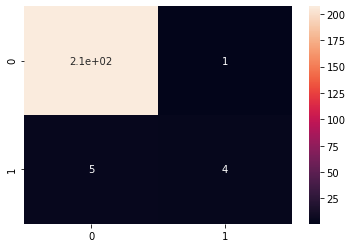

In [33]:
print("SVM Best Variables")

print('Best C =>   ', svm_best_model.best_estimator_.get_params()['C'])
print('Best Kernel =>   ', svm_best_model.best_estimator_.get_params()['kernel'])
print('Best Degree =>     ', svm_best_model.best_estimator_.get_params()['degree'])
print('Best Gamma =>     ', svm_best_model.best_estimator_.get_params()['gamma'])

matriz = cm(Y_test,svm_pred)
sns.heatmap(matriz, annot=True)

Obtenemos los mismos resultados que los autores

---

